In [1]:
### plt 한글 깨짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
# COLAB Restart 후 실행
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [3]:
import pandas as pd

test = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [4]:
import pandas as pd

In [5]:
# Load the data into a pandas DataFrame
train = pd.read_csv("train.csv")

In [6]:
train.head()

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,TRAIN_00003,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,TRAIN_00004,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2


In [7]:
test.head()

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,TEST_00000,9,금요일,5,927,28.0,1.570654,19.625000,0.0,0.0,165.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,차도
1,TEST_00001,5,수요일,3,926,28.0,1.712457,21.444444,0.0,0.0,175.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,식당
2,TEST_00002,5,월요일,6,1437,33.0,0.447496,25.200000,0.0,0.0,290.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지
3,TEST_00003,11,화요일,1,1739,31.0,0.878585,0.000000,0.0,0.0,285.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지
4,TEST_00004,10,목요일,10,830,15.0,0.496423,26.142857,0.0,0.0,95.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지


In [8]:
train_df = train.drop('ID', axis = 1).copy()
test_df = test.drop('ID', axis = 1).copy()

Simple EDA :  Target 값의 분포를 필수적으로 확인

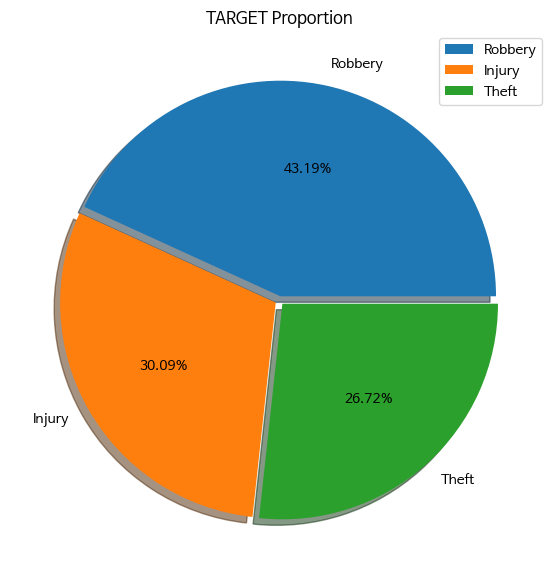

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,7), facecolor = 'w') #facecolor는 배경
plt.pie(x = train_df['TARGET'].value_counts(), autopct = '%.2f%%',
       labels = ['Robbery', 'Injury', 'Theft'], shadow = True, explode = [0.02, 0.02, 0.02]) #파이차트의 명령
plt.legend()
plt.title("TARGET Proportion")
plt.show()
#train_df 데이터프레임 내의 'TARGET' 열에서 각 범죄 유형의 비율을 나타내는 파이 차트를 그리고, 차트에는 범죄 유형별 비율, 그림자 효과, 돌출 효과가 적용되며, 범례와 제목이 포함

Missing NA값 확인

In [10]:
train_df.isna().sum() # NA값은 따로 존재하지 않음.

월          0
요일         0
시간         0
소관경찰서      0
소관지역       0
사건발생거리     0
강수량(mm)    0
강설량(mm)    0
적설량(cm)    0
풍향         0
안개         0
짙은안개       0
번개         0
진눈깨비       0
서리         0
연기/연무      0
눈날림        0
범죄발생지      0
TARGET     0
dtype: int64

<ipython-input-11-4f44a7d3e6cd>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = '요일', data = train_df, order = train_df['요일'].value_counts().index, palette = 'Greens_r', legend=False)


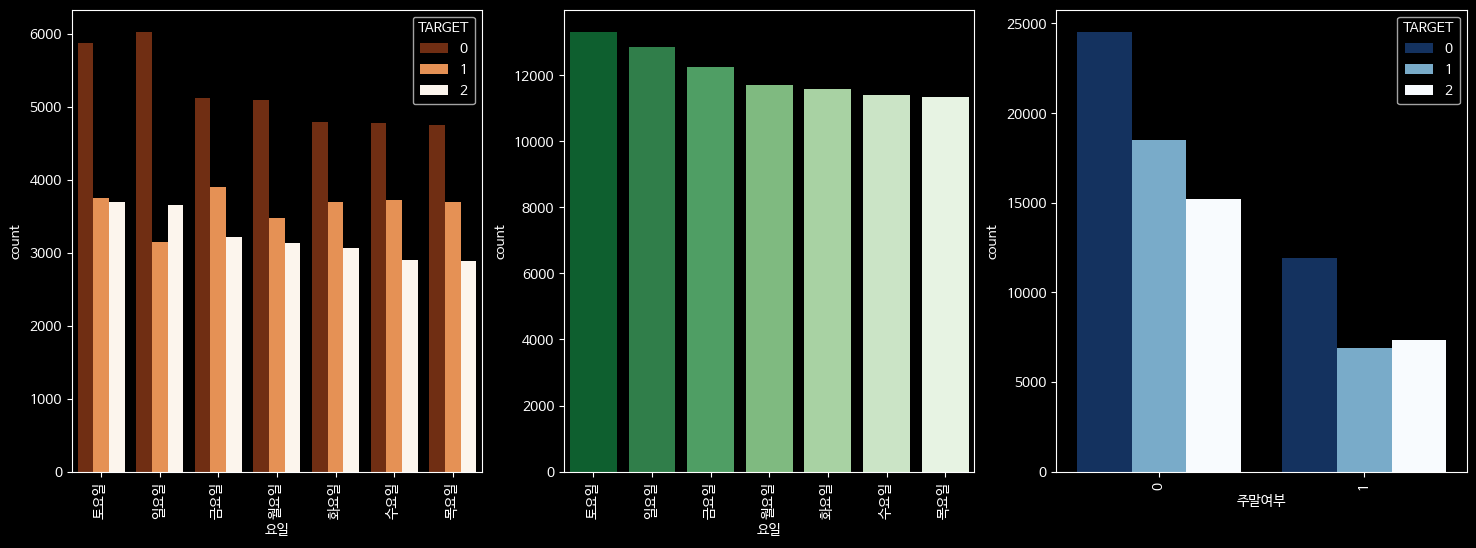

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 변경
plt.style.use('dark_background')
plt.figure(figsize = (18, 6))

plt.subplot(131)
sns.countplot(x = '요일', data = train_df, order = train_df['요일'].value_counts().index, hue = 'TARGET', palette = 'Oranges_r')
plt.xticks(rotation = 90)

plt.subplot(132)
sns.countplot(x = '요일', data = train_df, order = train_df['요일'].value_counts().index, palette = 'Greens_r', legend=False)
plt.xticks(rotation = 90)

plt.subplot(133)
train_df['주말여부'] = train_df['요일'].isin(['토요일','일요일']).astype('int')
sns.countplot(x = '주말여부', data = train_df, order = train_df['주말여부'].value_counts().index, hue = 'TARGET', palette = 'Blues_r')
plt.xticks(rotation = 90)

plt.show()



<ipython-input-12-0718cf0991c4>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = '시간', data = train_df, order = train_df['시간'].value_counts().index, palette = 'Blues_r')


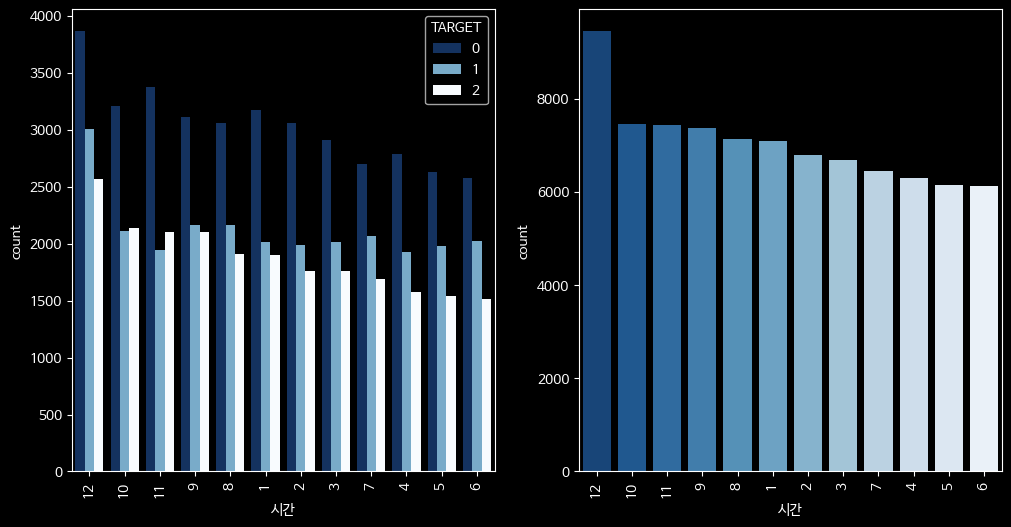

In [12]:
### 시각대 별 구분

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 6))

plt.subplot(121)
sns.countplot(x = '시간', data = train_df, order = train_df['시간'].value_counts().index, hue = 'TARGET', palette = 'Blues_r')
plt.xticks(rotation = 90)

plt.subplot(122)
sns.countplot(x = '시간', data = train_df, order = train_df['시간'].value_counts().index, palette = 'Blues_r')
plt.xticks(rotation = 90)

plt.show()

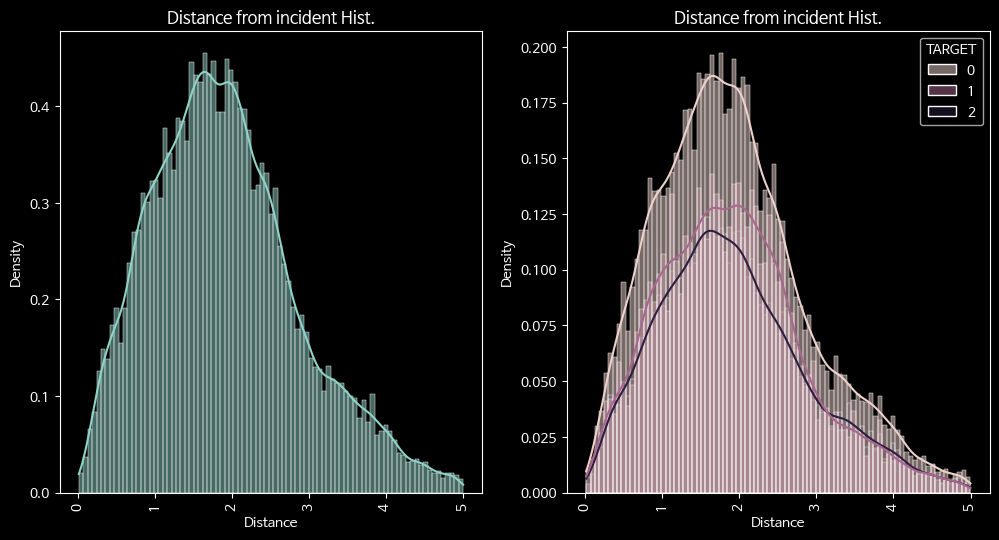

In [13]:
### 사건 발생 거리 Hist.
### 큰 이상 값은 존재하지 않는 것으로 보여서 Standard Scaling으로 스케일만 조정
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Distance from incident Hist.')
plt.xticks(rotation = 90)

sns.histplot(x = '사건발생거리', data = train_df, kde = True, stat = 'density')
plt.xlabel('Distance')

plt.subplot(122)
plt.title('Distance from incident Hist.')
plt.xticks(rotation = 90)

sns.histplot(x = '사건발생거리', data = train_df, hue = 'TARGET', kde = True, stat = 'density')
plt.xlabel('Distance')

plt.show()

In [14]:
### 소관 경찰서
len(set(test_df['소관경찰서'].unique()) - set(train_df['소관경찰서'].unique()))

0

In [15]:
### 소관 지역
len(set(test_df['소관지역'].unique()) - set(train_df['소관지역'].unique()))

0

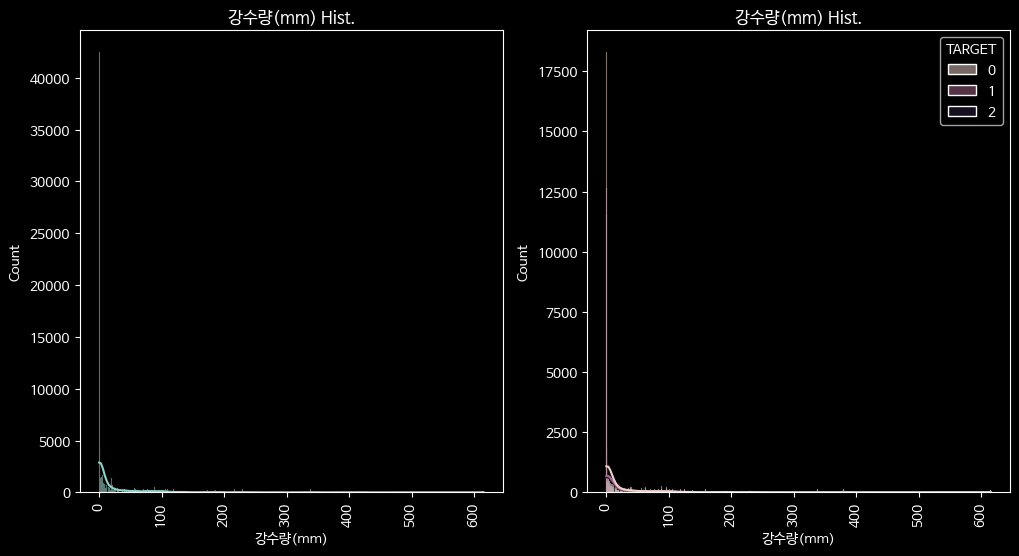

In [16]:
### 강수량(mm)
### 강수 여부 변수(binary)로 변경 후 진행예정
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('강수량(mm) Hist.')
plt.xticks(rotation = 90)

sns.histplot(x = '강수량(mm)', data = train_df, kde = True, stat = 'count')
plt.xlabel('강수량(mm)')

plt.subplot(122)
plt.title('강수량(mm) Hist.')
plt.xticks(rotation = 90)

sns.histplot(x = '강수량(mm)', data = train_df, hue = 'TARGET', kde = True, stat = 'count')
plt.xlabel('강수량(mm)')

plt.show()

In [17]:
### 범죄 발생지
len(set(test_df['범죄발생지'].unique()) - set(train_df['범죄발생지'].unique()))

0

In [18]:
print(sorted(train_df['범죄발생지'].unique()))

['공원', '백화점', '병원', '식당', '약국', '은행', '인도', '주거지', '주유소', '주차장', '차도', '편의점', '학교', '호텔/모텔']


<ipython-input-19-8bee0f9dd06b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = '범죄발생지', data = train_df, order = train_df['범죄발생지'].value_counts().index, palette = 'Reds_r')


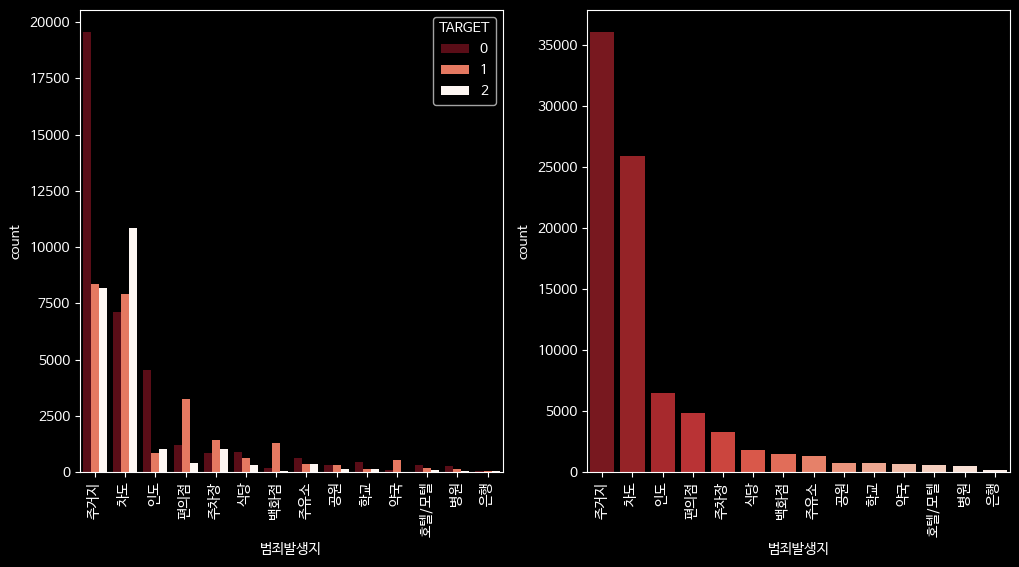

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 6))

plt.subplot(121)
sns.countplot(x = '범죄발생지', data = train_df, order = train_df['범죄발생지'].value_counts().index, hue = 'TARGET', palette = 'Reds_r')
plt.xticks(rotation = 90)

plt.subplot(122)
sns.countplot(x = '범죄발생지', data = train_df, order = train_df['범죄발생지'].value_counts().index, palette = 'Reds_r')
plt.xticks(rotation = 90)

plt.show()

<ipython-input-20-c10f5cd895f3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = '소관경찰서', data = train_df, order = train_df['소관경찰서'].value_counts().index[:20], palette = 'Blues_r')


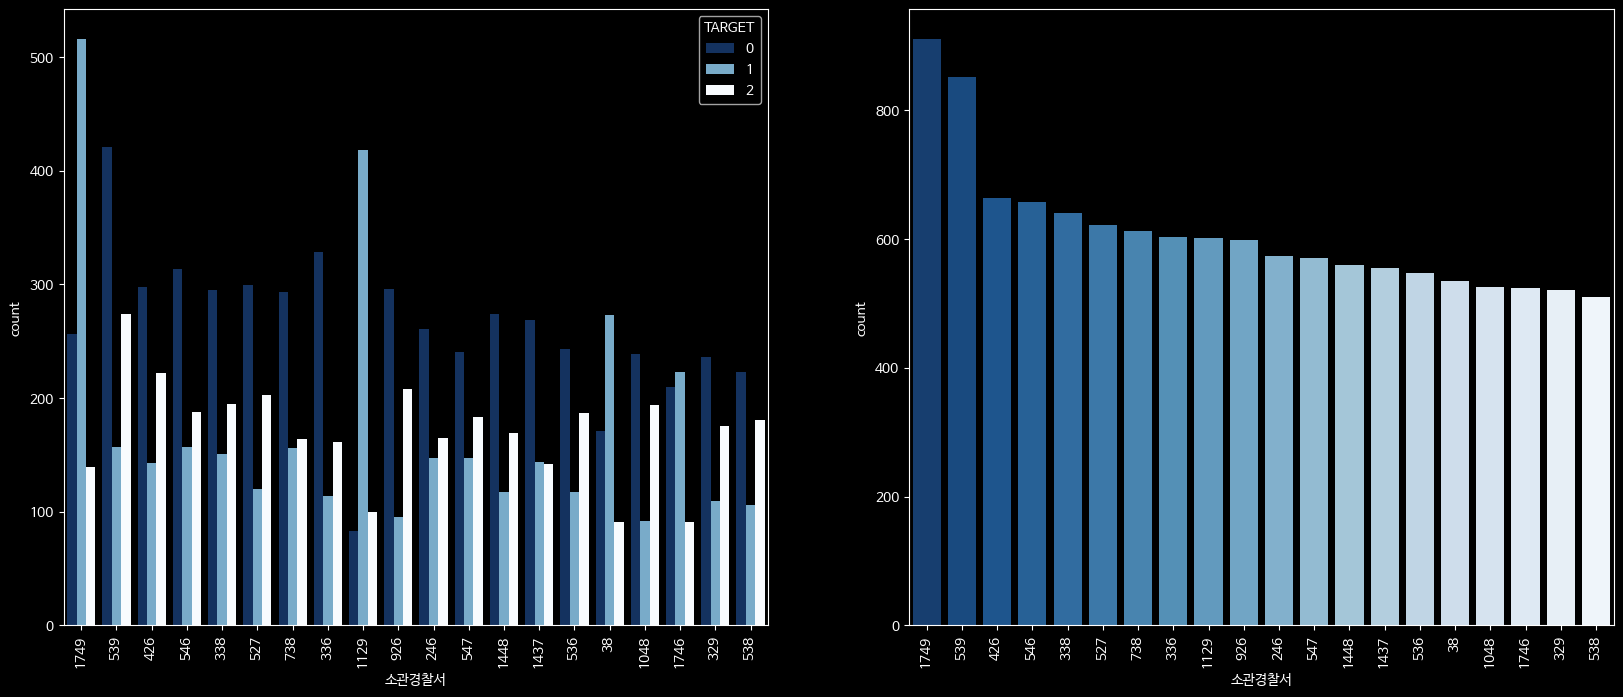

In [20]:
#소관경찰서별 범죄발생 빈도 확인
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 변경
plt.style.use('dark_background')

plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.countplot(x = '소관경찰서', data = train_df, order = train_df['소관경찰서'].value_counts().index[:20], hue = 'TARGET', palette = 'Blues_r')
plt.xticks(rotation = 90)

plt.subplot(122)
sns.countplot(x = '소관경찰서', data = train_df, order = train_df['소관경찰서'].value_counts().index[:20], palette = 'Blues_r')
plt.xticks(rotation = 90)

plt.show()

<ipython-input-21-70b84f417ad6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = '소관지역', data = train_df, order = train_df['소관지역'].value_counts().index, palette = 'Blues_r')


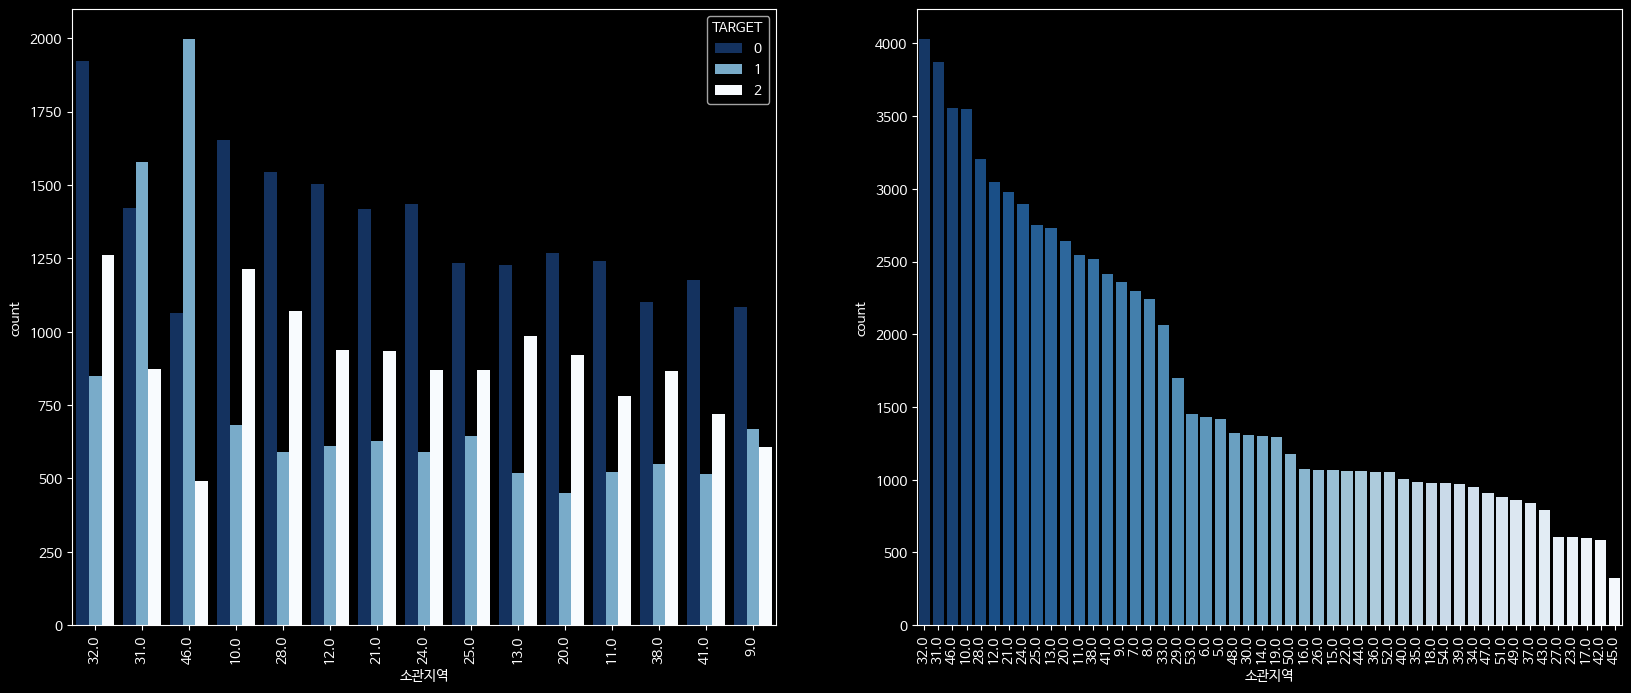

In [21]:
#소관지역별 범죄발생빈도 확인
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 변경
plt.style.use('dark_background')

plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.countplot(x = '소관지역', data = train_df, order = train_df['소관지역'].value_counts().index[:15], hue = 'TARGET', palette = 'Blues_r')
plt.xticks(rotation = 90)

plt.subplot(122)
sns.countplot(x = '소관지역', data = train_df, order = train_df['소관지역'].value_counts().index, palette = 'Blues_r')
plt.xticks(rotation = 90)

plt.show()

데이터 전처리

In [22]:
train_df = train.drop('ID', axis = 1).copy()
test_df = test.drop('ID', axis = 1).copy()

데이터 전처리 후 가설과 입증

In [23]:
### 월 변수를 활용해 계절변수 추가
import numpy as np

# 봄, 여름, 가을, 겨울 (1,2,3,4)
season = np.zeros(len(train_df))
season[train_df.query('월 >= 3 and 월 <= 5').index] = 1
season[train_df.query('월 >= 6 and 월 <= 8').index] = 2
season[train_df.query('월 >= 9 and 월 <= 11').index] = 3
season[train_df.query('월 <= 2 or 월 == 12').index] = 4

train_df['계절'] = season.astype(int)

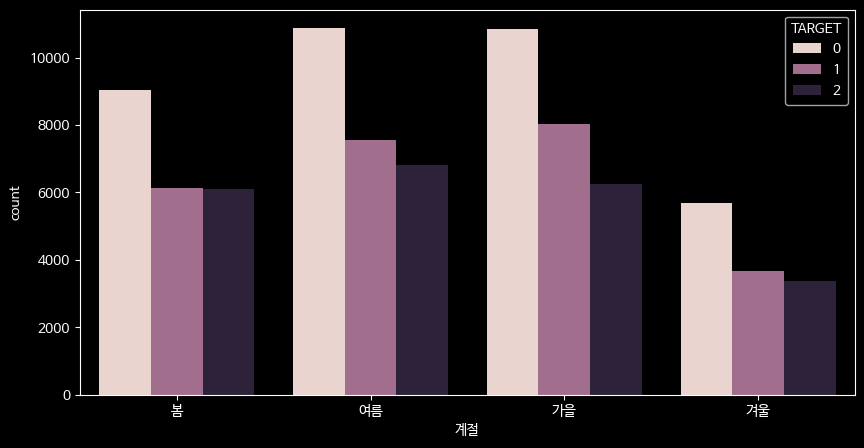

In [24]:
#위의 데이터 전처리를 통한 가설 설정과 시각화
#가설: "계절에 따라 범죄 유형이 달라질 것이다."
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='계절', hue='TARGET')
plt.xticks(ticks=[0, 1, 2, 3], labels=['봄', '여름', '가을', '겨울'])
plt.show()

In [25]:
### 요일 구분 + 주말여부 추가
#레이블 인코딩 : 범주형 -> 수치형
from sklearn.preprocessing import LabelEncoder
le_week = LabelEncoder()
le_week.fit(train_df['요일'].astype('category'))

train_df['요일'] = le_week.transform(train_df['요일'].astype('category')) #카테고리형
train_df['주말여부'] = train_df['요일'].isin(['토요일','일요일']).astype('int') #int가 수치형

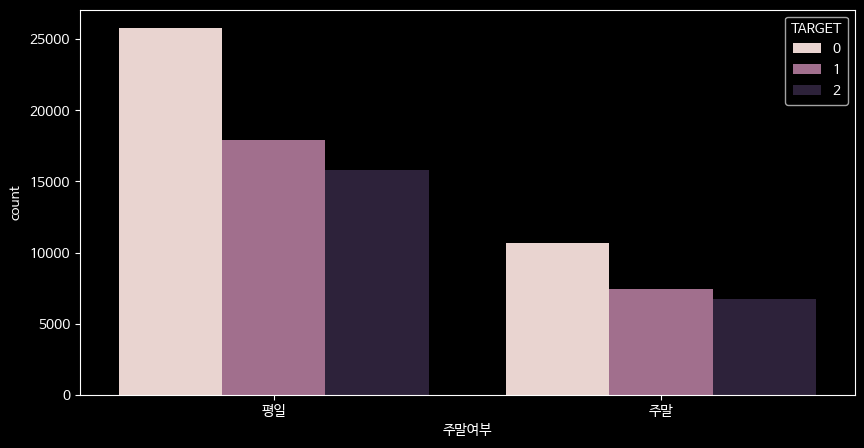

In [26]:
#원본 데이터에서 주말여부 설정
train_df['주말여부'] = (train_df['요일'] >= 5).astype(int) # '토요일'과 '일요일'이 5, 6으로 인코딩되었다고 가정

#그래프 출력
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='주말여부', hue='TARGET')
plt.xticks(ticks=[0, 1], labels=['평일', '주말'])
plt.show()

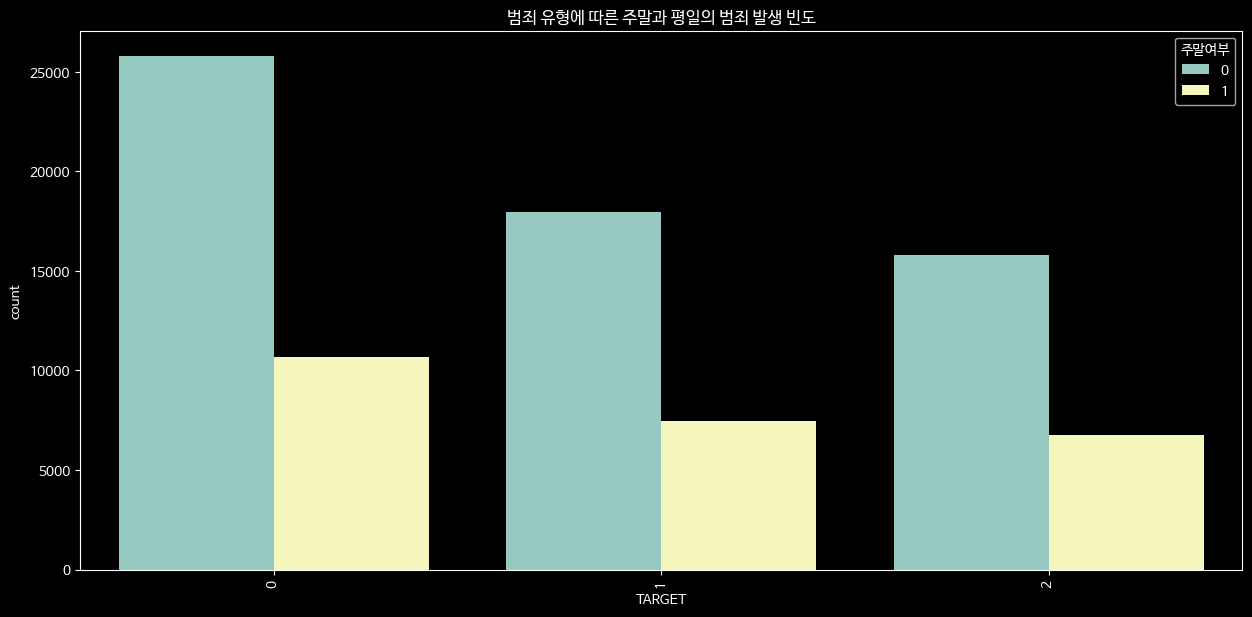

In [27]:
# 원본 데이터에서 주말여부 설정
train_df['주말여부'] = (train_df['요일'] >= 5).astype(int) # '토요일'과 '일요일'이 5, 6으로 인코딩되었다고 가정

# 범죄 유형에 따른 주말과 평일의 범죄 발생 빈도를 비교
plt.figure(figsize=(15, 7))
sns.countplot(data=train_df, x='TARGET', hue='주말여부')
plt.xticks(rotation=90)
plt.title('범죄 유형에 따른 주말과 평일의 범죄 발생 빈도')
plt.show()
#'주말여부' 변수에서 0과 1은 각각 '평일'과 '주말'을 의미

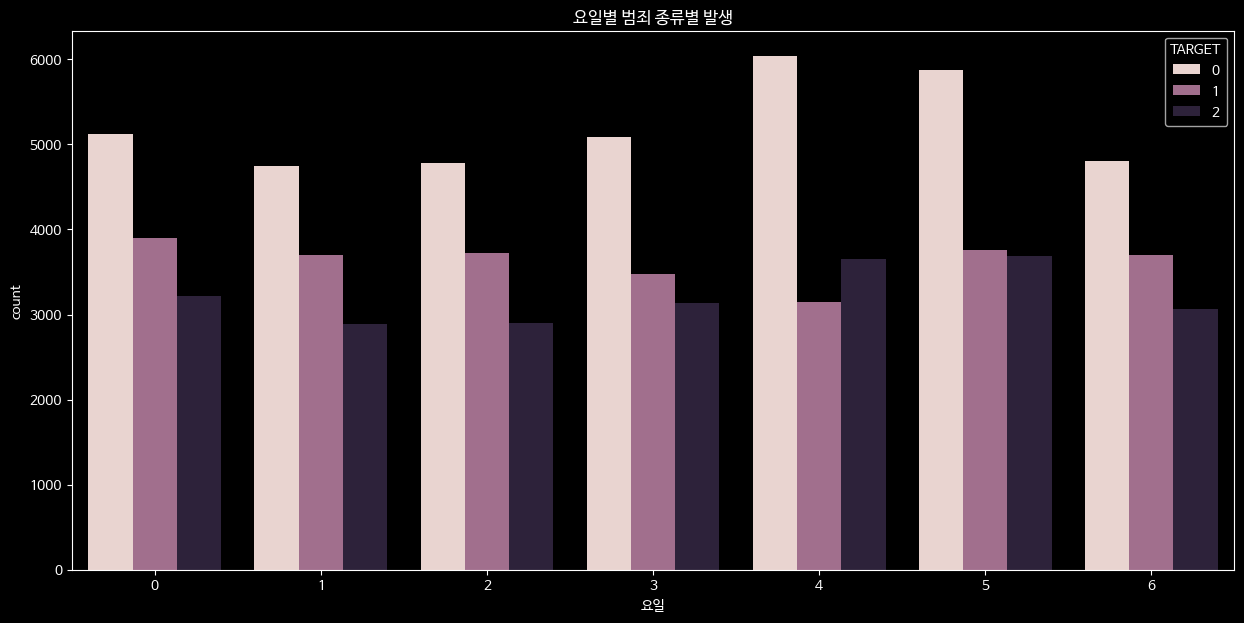

In [28]:
#모든 요일의 범죄 발생 비교
plt.figure(figsize=(15, 7))
sns.countplot(data=train_df, x='요일', hue='TARGET')
plt.title('요일별 범죄 종류별 발생')
plt.show()


In [29]:
### 시간 구분 - 12시각 기준
### 3시간씩 구분
import numpy as np

time_cate = np.zeros(len(train_df))
time_cate[train_df.query('시간 <= 3').index] = 1
time_cate[train_df.query('시간 > 3 and 시간 <= 6').index] = 2
time_cate[train_df.query('시간 > 6 and 시간 <= 9').index] = 3
time_cate[train_df.query('시간 > 9').index] = 4

### 카테고리형으로 변환한다.
train_df['시간구분'] = time_cate.astype(int)
train_df['시간구분'] = train_df['시간구분'].astype('category')

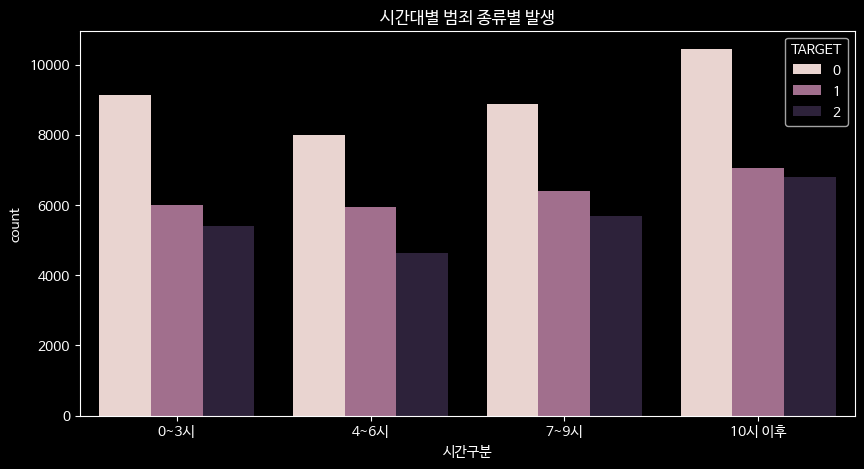

In [30]:
###가설: "하루 중 특정 시간대에 범죄 발생 빈도가 다를 것이다.
#특히, 사람들이 많이 활동하는 시간대에는 범죄 발생 빈도가 더 높을 것이다."
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='시간구분', hue='TARGET')
plt.xticks(ticks=[0, 1, 2, 3], labels=['0~3시', '4~6시', '7~9시', '10시 이후'])
plt.title('시간대별 범죄 종류별 발생') 
plt.show()

In [31]:
### 소관경찰서 Category형으로 구분
train_df['소관경찰서'] = train_df['소관경찰서'].astype('category')

### 소관지역 Category형으로 구분
train_df['소관지역'] = train_df['소관지역'].astype('category')

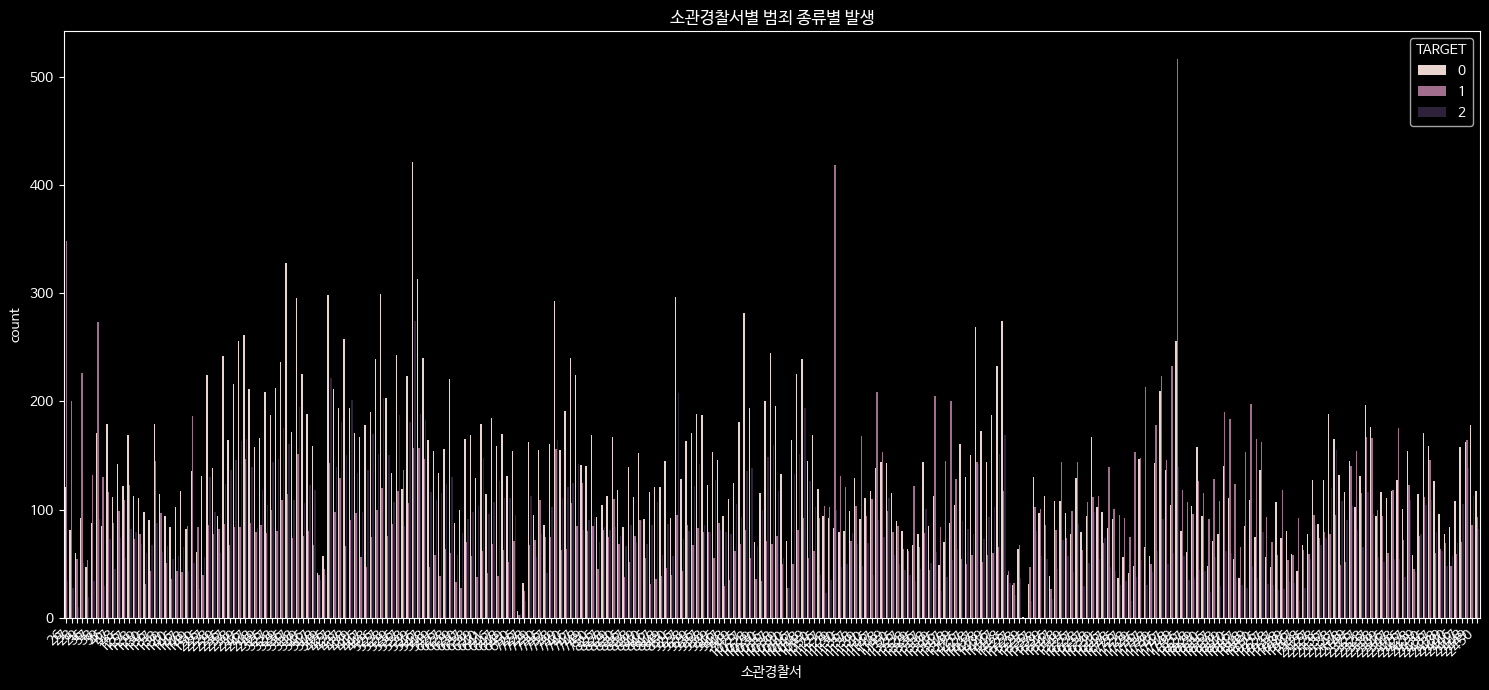

In [32]:
plt.figure(figsize=(15, 7))
sns.countplot(data=train_df, x='소관경찰서', hue='TARGET')
plt.xticks(rotation=45, ha='right') # 라벨들을 45도 기울입니다.
plt.title('소관경찰서별 범죄 종류별 발생')
plt.tight_layout() # 그래프의 레이아웃을 조정하여 라벨들이 그래프 바깥으로 나가지 않게 합니다.
plt.show()

In [33]:
### 사건발생거리 - 스케일링 하지 않고, 그대로 사용
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_df[['사건발생거리']])
train_df['사건발생거리'] = scaler.transform(train_df[['사건발생거리']])
'''

"\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nscaler.fit(train_df[['사건발생거리']])\ntrain_df['사건발생거리'] = scaler.transform(train_df[['사건발생거리']])\n"

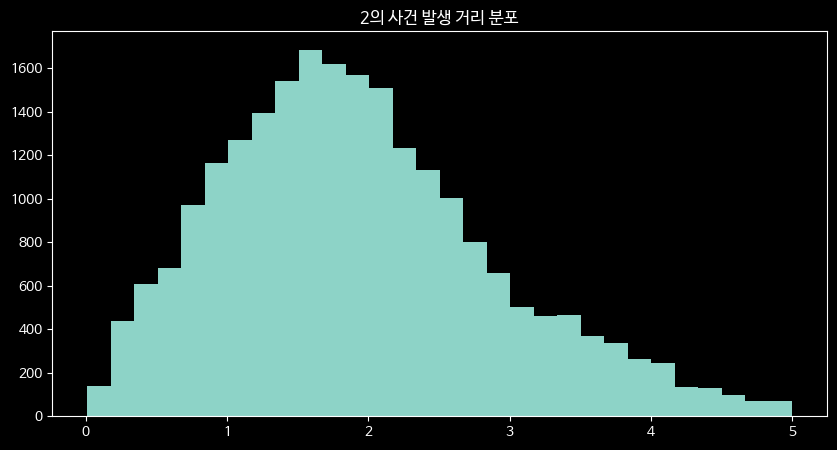

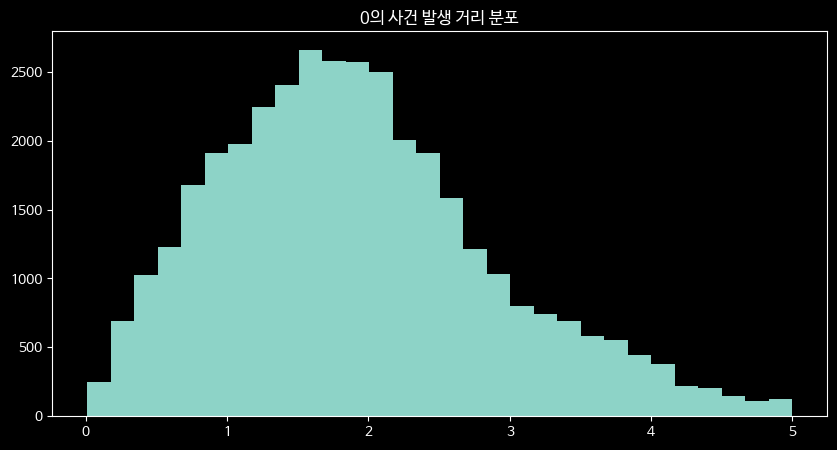

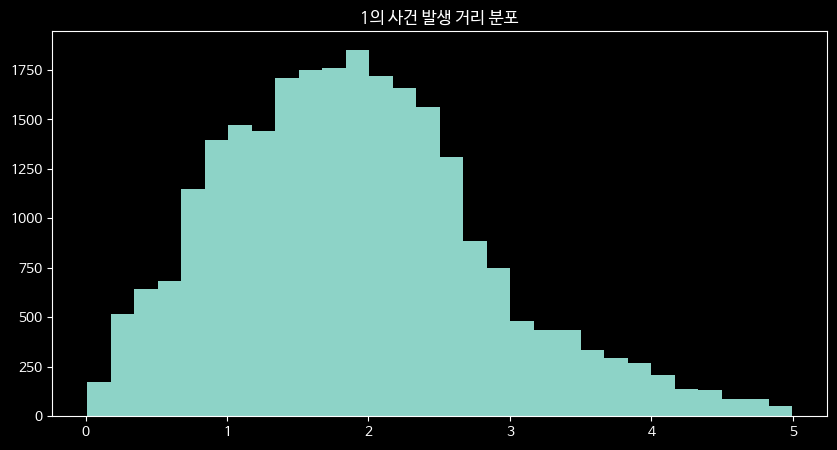

In [34]:
# "범죄 발생 거리가 범죄 유형에 영향을 미칠 것이다"라는 가설
# 범죄 유형의 종류를 가져옵니다.
crime_types = train_df['TARGET'].unique()

# 각 범죄 유형별로 히스토그램을 그립니다.
for crime_type in crime_types:
    subset = train_df[train_df['TARGET'] == crime_type]
    plt.figure(figsize=(10, 5))
    plt.hist(subset['사건발생거리'], bins=30)
    plt.title(f'{crime_type}의 사건 발생 거리 분포')
    plt.show()


In [35]:
### 강수량 Binary 화
### train_df['강수량(mm)'] = (train_df['강수량(mm)'] > 0).astype('int')

In [36]:
### 강설량 Binary 화 & 적설량 Drop
### train_df['강설량(mm)'] = (train_df['강설량(mm)'] > 0).astype('int')
train_df = train_df.drop(['적설량(cm)'], axis = 1)

In [41]:
### 풍향 구분
import numpy as np

cardinal_directions = np.zeros(len(train_df))
cardinal_directions[train_df.query('풍향 <= 45').index] = 1 # 북 ~ 북동
cardinal_directions[train_df.query('풍향 > 45 and 풍향 <= 90').index] = 2 # 북동 ~ 동
cardinal_directions[train_df.query('풍향 > 90 and 풍향 <= 135').index] = 3 # 동 ~ 남동
cardinal_directions[train_df.query('풍향 > 135 and 풍향 <= 180').index] = 4 # 남동 ~ 남
cardinal_directions[train_df.query('풍향 > 180 and 풍향 <= 225').index] = 5 # 남 ~ 남서
cardinal_directions[train_df.query('풍향 > 225 and 풍향 <= 270').index] = 6 # 남서 ~ 서
cardinal_directions[train_df.query('풍향 > 270 and 풍향 <= 315').index] = 7 # 서 ~ 북서
cardinal_directions[train_df.query('풍향 > 315 and 풍향 <= 360').index] = 8 # 북서 ~ 북

# 카테고리형으로 변환한다.
train_df['풍향'] = cardinal_directions.astype(int)
train_df['풍향'] = train_df['풍향'].astype('category')

In [42]:
### 범죄발생지 카테고리형으로 변환
from sklearn.preprocessing import LabelEncoder
le_loc = LabelEncoder()
le_loc.fit(train_df['범죄발생지'].astype('category'))

train_df['범죄발생지'] = le_loc.transform(train_df['범죄발생지'].astype('category'))


In [43]:
# 정수형으로 변환
for k in ['소관경찰서',	'소관지역',	'풍향',	'안개',	'짙은안개',	'번개',	'진눈깨비',	'서리',	'연기/연무',	'눈날림',	'범죄발생지',	'계절',	'주말여부',	'시간구분', 'TARGET']:
  train_df[k] = train_df[k].astype('int')

In [44]:
train_df.head() # 전처리 Finished

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),풍향,안개,...,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET,계절,주말여부,시간구분
0,9,6,10,137,8,2.611124,0.000,0.0,6,0,...,0,0,0,0,0,10,2,3,1,4
1,11,6,6,438,13,3.209093,0.000,0.0,5,0,...,0,0,0,0,0,10,0,3,1,2
2,8,4,6,1729,47,1.619597,0.000,0.0,1,1,...,0,0,0,1,0,6,1,2,0,2
3,5,3,6,2337,53,1.921615,11.375,0.0,5,1,...,0,0,0,0,0,7,1,1,0,2
4,9,4,11,1439,41,1.789721,0.000,0.0,6,0,...,0,0,0,0,0,8,2,3,0,4


In [37]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-coding.
(Reading database ... 121772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [38]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 라이브러리 불러오기
import matplotlib.pyplot as plt

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 표시
plt.rc('axes', unicode_minus=False)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

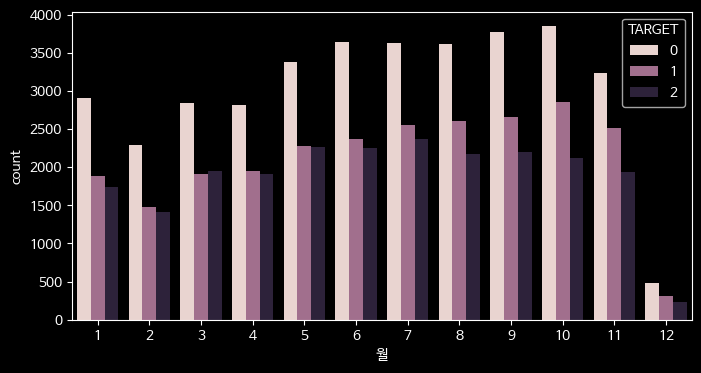

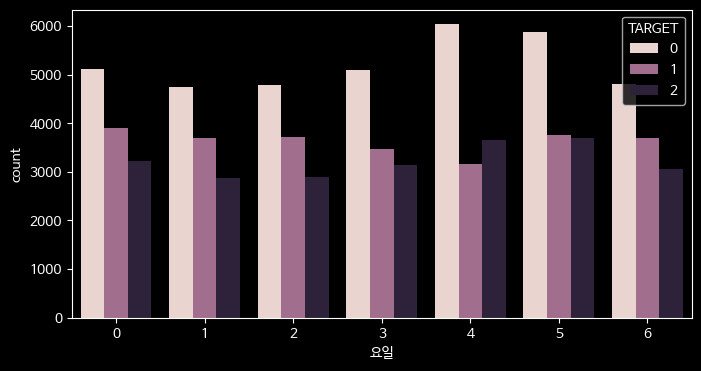

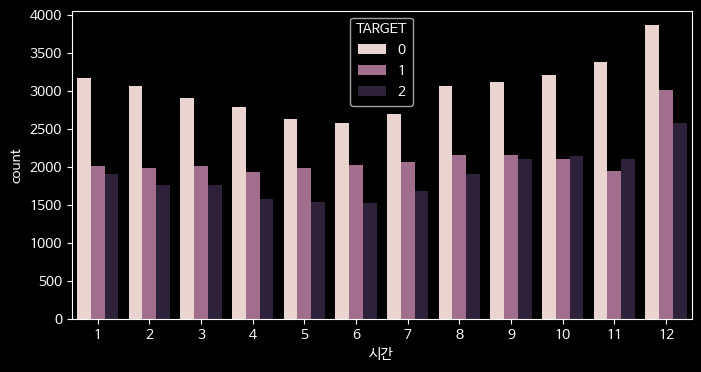

In [39]:
# 시간, 요일, 월별 범죄 유형 분포 확인
for feature in ['월', '요일', '시간']:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=feature, hue='TARGET')


<Axes: xlabel='TARGET', ylabel='count'>

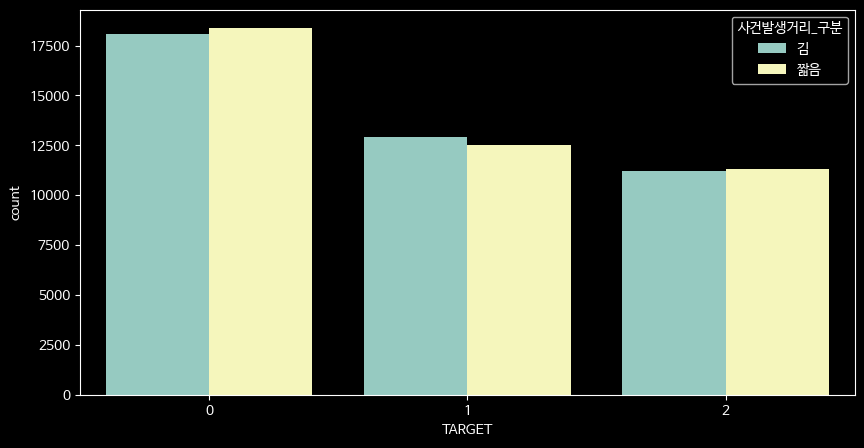

In [40]:
# 구역별 범죄 유형 분포 확인
# 사건 발생 거리를 짧은 거리와 긴 거리로 나누기
train['사건발생거리_구분'] = ['짧음' if x < train['사건발생거리'].median() else '김' for x in train['사건발생거리']]

plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='TARGET', hue='사건발생거리_구분')
